In [1]:


try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import StandardScaler, LabelEncoder
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score
    from sklearn.decomposition import PCA
except ImportError as e:
    print(f"Library Import Error: {e}")
    # Removed sys.exit() to prevent script termination


In [2]:
try:
    file_path = r"C:\\Users\\sarat\\Downloads\\logistics_datasets.csv"
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print("Error: CSV file not found at the specified path.")
    df = pd.DataFrame()  # create empty DataFrame to allow continuation
except Exception as e:
    print(f"Error while reading CSV: {e}")
    df = pd.DataFrame()

In [3]:
try:
    drop_columns = [
        'time', 'season', 'string', 'replenishment_status', 'ad_channel',
        'product_id', 'product_category', 'perishability', 'store_location',
        'store_region'
    ]
    df_cleaned = df.drop(columns=drop_columns, errors='ignore') if not df.empty else df.copy()
except Exception as e:
    print(f"Error while dropping columns: {e}")
    df_cleaned = df.copy()

In [4]:

try:
    numeric_cols = df_cleaned.select_dtypes(include=[np.number])
    if numeric_cols.empty:
        raise ValueError("No numeric columns available for imputation.")
    imputer = SimpleImputer(strategy='mean')
    numeric_imputed = pd.DataFrame(
        imputer.fit_transform(numeric_cols),
        columns=numeric_cols.columns
    )
except Exception as e:
    print(f"Error during imputation: {e}")
    numeric_imputed = pd.DataFrame()


In [5]:
try:
    if not numeric_imputed.empty:
        scaler = StandardScaler()
        df_scaled = scaler.fit_transform(numeric_imputed)
    else:
        df_scaled = np.array([])
except Exception as e:
    print(f"Error during scaling: {e}")
    df_scaled = np.array([])


In [6]:
try:
    if df_scaled.size > 0:
        kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(df_scaled)
    else:
        cluster_labels = []
except Exception as e:
    print(f"KMeans error: {e}")
    cluster_labels = []


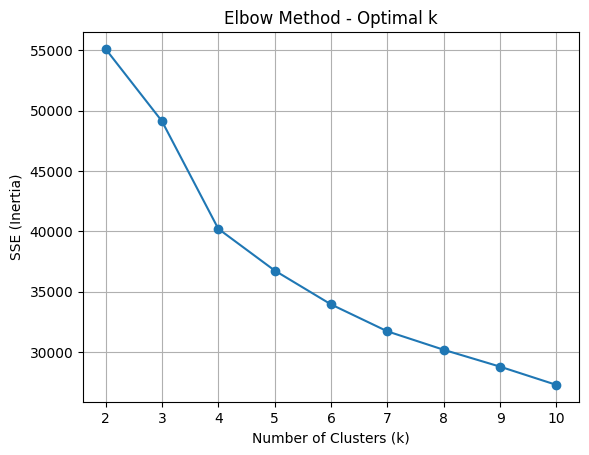

In [14]:
# ================================
# STEP 10: Elbow Method
# ================================
sse = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

plt.figure()
plt.plot(k_range, sse, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Method - Optimal k")
plt.grid(True)
plt.show()

# ================================
# STEP 11: Set optimal_k
# ================================
optimal_k = 4   # <- you manually set this after looking at the elbow plot

# ================================
# STEP 12: Fit KMeans using optimal_k
# ================================
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(df_scaled)
